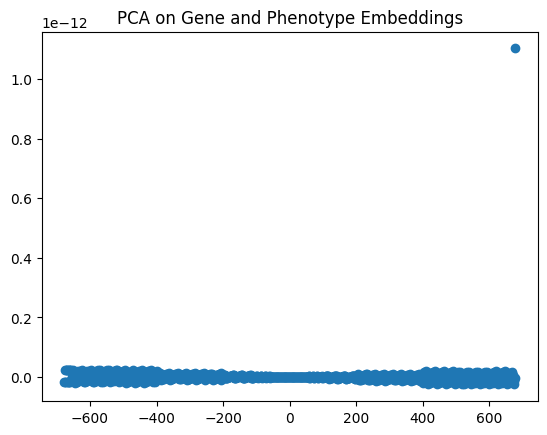

In [2]:
#import necessary libraries
import hashlib
import random
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Hash your name
name = "YaminiChilukuri"  # Use your full name in lowercase without spaces
hash_value = int(hashlib.sha256(name.encode('utf-8')).hexdigest(), 16) % (10**8)

# Set the seed for reproducibility
random.seed(hash_value)

# Load the dataset
phenotypes_genes_df = pd.read_csv("C:/Users/Admin/Datasets/zenodo_directory/data/benchmark_datasets/opentargets_step2.for_llm.tsv", sep='\t')

# Sample 500 phenotypes
phenotype_sample = phenotypes_genes_df.sample(n=500, random_state=hash_value)

# Save your unique dataset
phenotype_sample.to_csv("unique_phenotype_gene_sample.csv", index=False)

# Load gene and phenotype embeddings
gene_embeddings = pd.read_csv("C:/Users/Admin/Datasets/zenodo_directory/data/helper_datasets/gene_embeddings.csv")
phenotype_embeddings = pd.read_csv("C:/Users/Admin/Datasets/zenodo_directory/data/helper_datasets/phenotype_embeddings.csv")

# Ensure the order matches between the samples and embeddings

# Load ground truth data to map causal genes
ground_truth = pd.read_csv("C:/Users/Admin/Datasets/zenodo_directory/data/benchmark_datasets/opentargets_step2.labels", sep='\t')

# Merge the ground truth with your sample
phenotype_sample['causal_gene'] = ground_truth['gene']  # assuming ground truth has a causal_gene column

# Concatenate the embeddings
combined_embeddings = pd.concat([phenotype_embeddings, gene_embeddings], axis=1)

# ** Select only numeric columns for PCA **
numeric_embeddings = combined_embeddings.select_dtypes(include=[float, int])

# Ensure there are no NaN values in the numeric embeddings (optional but recommended)
numeric_embeddings = numeric_embeddings.dropna()

# Apply PCA to the filtered numeric data
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(numeric_embeddings)

# Plot the results
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title('PCA on Gene and Phenotype Embeddings')
plt.show()


# PCA on Gene and Phenotype Embeddings

## Introduction
This Jupyter Notebook performs Principal Component Analysis (PCA) on gene and phenotype embeddings derived from biological datasets. The primary goal is to reduce the dimensionality of the embeddings while retaining as much variance as possible, allowing for easier visualization and interpretation of the data.

## 1. Import Necessary Libraries
In this section, we import the libraries required for the analysis. The libraries include:

- `hashlib`: For generating a hash value from the user's name.
- `random`: For setting a reproducible random seed.
- `pandas`: For data manipulation and analysis.
- `sklearn.decomposition`: For performing PCA.
- `matplotlib.pyplot`: For plotting the results.

```python
import hashlib
import random
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## 2.Hash your name (I used my name)
To ensure reproducibility of the random sampling, we generate a hash value based on the user's name. This hash value will be used to seed the random number generator.

```python
name = "YaminiChilukuri"  # Use your full name in lowercase without spaces
hash_value = int(hashlib.sha256(name.encode('utf-8')).hexdigest(), 16) % (10**8)

## 3.Set the Seed for Reproducibility
By setting the seed with the generated hash value, we can ensure that any random sampling performed in the notebook will produce the same results each time it is run.

```python
random.seed(hash_value)

## 4.Load the Dataset
In this section, we load the phenotype-gene dataset using pandas. The dataset is expected to be in tab-separated format.

```python
Copy code
phenotypes_genes_df = pd.read_csv("C:/Users/Admin/Datasets/zenodo_directory/data/benchmark_datasets/opentargets_step2.for_llm.tsv", sep='\t')


## 5. Sample 500 Phenotypes
Next, we randomly sample 500 phenotypes from the loaded dataset using the previously set random seed. This sample will be used for further analysis.

```python
phenotype_sample = phenotypes_genes_df.sample(n=500, random_state=hash_value)

## 6. Save Your Unique Dataset
The sampled phenotypes are saved to a new CSV file for future reference and analysis.

```python
phenotype_sample.to_csv("unique_phenotype_gene_sample.csv", index=False)

## 7. Load Gene and Phenotype Embeddings
We then load the gene and phenotype embeddings from separate CSV files. These embeddings represent the features of genes and phenotypes in a numerical format suitable for PCA.

```python
gene_embeddings = pd.read_csv("C:/Users/Admin/Datasets/zenodo_directory/data/helper_datasets/gene_embeddings.csv")
phenotype_embeddings = pd.read_csv("C:/Users/Admin/Datasets/zenodo_directory/data/helper_datasets/phenotype_embeddings.csv")

## 8. Load Ground Truth Data to Map Causal Genes
We load the ground truth data that contains information about causal genes associated with the phenotypes. This data will be merged with the phenotype sample.

```python
ground_truth = pd.read_csv("C:/Users/Admin/Datasets/zenodo_directory/data/benchmark_datasets/opentargets_step2.labels", sep='\t')

## 9. Merge the Ground Truth with Your Sample
We merge the ground truth data with the sampled phenotypes, adding a new column that indicates the causal gene for each phenotype.

```python
phenotype_sample['causal_gene'] = ground_truth['gene']  # assuming ground truth has a causal_gene column


## 10. Concatenate the Embeddings
We concatenate the phenotype and gene embeddings into a single DataFrame. This allows us to perform PCA on both types of embeddings together.

```python
combined_embeddings = pd.concat([phenotype_embeddings, gene_embeddings], axis=1)

## 11. Select Only Numeric Columns for PCA
To perform PCA, we need to ensure that only numeric columns are included. Here, we select the columns that contain numeric data types (float and int).

```python
numeric_embeddings = combined_embeddings.select_dtypes(include=[float, int])


## 12. Handle Missing Values
It is advisable to check for and handle any missing values in the numeric embeddings. Here, we drop any rows that contain NaN values.

```python
numeric_embeddings = numeric_embeddings.dropna()


## 13. Apply PCA to the Filtered Numeric Data
We instantiate the PCA model, specifying that we want to reduce the dimensionality to 2 components. We then fit and transform the numeric embeddings.

```python
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(numeric_embeddings)


## 14. Plot the Results
Finally, we visualize the reduced embeddings in a scatter plot. This plot helps to see the distribution and clustering of the phenotypes and genes in the reduced dimensional space.

python
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title('PCA on Gene and Phenotype Embeddings')
plt.show()

## Conclusion
This analysis demonstrated how to perform PCA on gene and phenotype embeddings to visualize complex biological data. The reduction in dimensionality allows for a more straightforward interpretation of the relationships between different phenotypes and genes.

vbnet

### How to Use This Documentation

1. **Copy and Paste**: Copy the entire Markdown documentation and paste it into a new Markdown cell in your Jupyter Notebook.
2. **Run the Markdown Cell**: After pasting, run the cell by selecting it and pressing `Shift + Enter` to render the documentation.

This documentation provides a clear structure, explains each step of the code, and gives context to the analysis, making it easier for anyone reading the notebook to understand your work.








